In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv('train_2D.csv',nrows=200000)
test_df = pd.read_csv('test_2D.csv',nrows=200000)


In [3]:
X_train = train_df.drop(columns=['x-midplane','y-midplane']).values
X_test = test_df.drop(columns=['x-midplane','y-midplane']).values

y_train = train_df[['x-midplane','y-midplane']].values
y_test = test_df[['x-midplane','y-midplane']].values


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape((len(X_train),13,21,1))
X_test = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape((len(X_train),13,21,1))


In [5]:
X_train.shape

(200000, 13, 21, 1)

In [6]:
model = Sequential()
model.add(Conv2D(64, 3, activation='relu', input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(2, activation='linear'))
model.summary() 

W1003 09:57:15.859659 140565185214272 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1003 09:57:15.973114 140565185214272 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 09:57:16.344012 140565185214272 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 11, 19, 64)        640       
_________________________________________________________________
flatten_1 (Flatten)          (None, 13376)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 26754     
Total params: 27,394
Trainable params: 27,394
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

W1003 09:57:16.869890 140565185214272 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [8]:
es = EarlyStopping(patience=10)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=64,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

W1003 09:57:18.069517 140565185214272 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1003 09:57:18.152543 140565185214272 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 160000 samples, validate on 40000 samples
Epoch 1/80
160000/160000 [==============================] - 16s 98us/step - loss: 152.3389 - mean_squared_error: 152.3389 - val_loss: 64.0631 - val_mean_squared_error: 64.0631
Epoch 2/80
160000/160000 [==============================] - 11s 69us/step - loss: 52.6548 - mean_squared_error: 52.6548 - val_loss: 45.2369 - val_mean_squared_error: 45.2369
Epoch 3/80
160000/160000 [==============================] - 11s 67us/step - loss: 42.9918 - mean_squared_error: 42.9918 - val_loss: 41.0604 - val_mean_squared_error: 41.0604
Epoch 4/80
160000/160000 [==============================] - 11s 67us/step - loss: 38.4719 - mean_squared_error: 38.4719 - val_loss: 36.3509 - val_mean_squared_error: 36.3509
Epoch 5/80
160000/160000 [==============================] - 10s 64us/step - loss: 34.5634 - mean_squared_error: 34.5634 - val_loss: 34.2476 - val_mean_squared_error: 34.2476
Epoch 6/80
160000/160000 [==============================] - 11s 66us/step - l

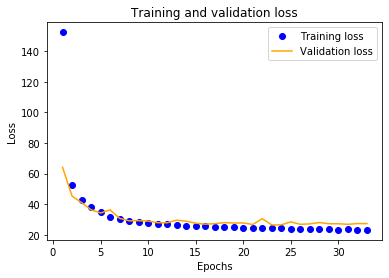

In [9]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('/home/jieun201/fullprecision400e_yprofile/loss.png')

In [14]:
p_test = model.predict(X_test) 


In [15]:
residuals = np.subtract(p_test,y_test)


(0, 15010.8)

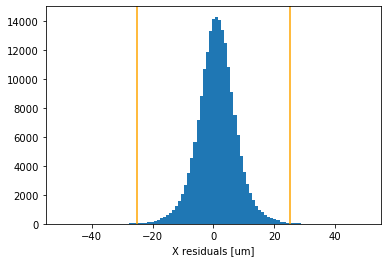

In [16]:
# X coordinate
x = np.linspace(-50,50,100)

plt.hist(residuals[:,0],bins=x)
ymax = plt.ylim()[1]
plt.plot([25,25],[0,ymax],color='orange')
plt.plot([-25,-25],[0,ymax],color='orange')
plt.xlabel('X residuals [um]')
plt.ylim(0,ymax)

(0, 25218.9)

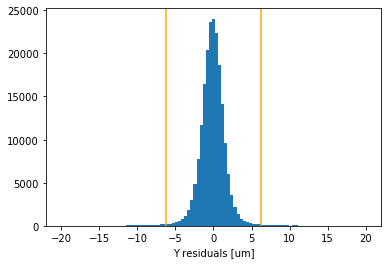

In [17]:
# Y coordinate
plt.hist(residuals[:,1],bins=np.linspace(-20,20,100))
ymax = plt.ylim()[1]
plt.plot([12.5/2,12.5/2],[0,ymax],color='orange')
plt.plot([-12.5/2,-12.5/2],[0,ymax],color='orange')
plt.xlabel('Y residuals [um]')
plt.ylim(0,ymax)